In [3]:
# Python Project 2
# Portion by Alexander Herring
# Foregin aid data from US AID, https://explorer.usaid.gov/data.html#tab-data-download
# GDP data from World Bank, https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?view=chart

#Question 1: What are the high level U.S. foreign aid spending trends?
#Historic Trends in US Foreign Aid spending
#150 account levels compared to overall US budget
#Annual spending levels from the 150 account
#Annual spending levels by agency from 150 account
#Annual spending levels by category from 150 account
#Military vs. economic spending
#Recipient countries (ranked)

In [4]:
# Import packages and choose settings

import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
pd.options.display.float_format = "${:,.2f}".format
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from functools import partial
from numbers import Number
import matplotlib.ticker as ticker

In [5]:
# Function code I found to format as percent

def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    if isinstance(v, Number):
        return "{{:{}%}}".format(precision).format(v)
    else:
        raise TypeError("Numeric type required")

In [6]:
# Import the data

us_for_aid = pd.read_csv("C:\\Users\\Alex\\Desktop\\Python Project 2\\us_foreign_aid_complete.csv", index_col = False)
us_for_aid_df = pd.DataFrame(us_for_aid)
gdp_world = pd.read_csv("C:\\Users\\Alex\\Desktop\\Python Project 2\\API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows = 4, index_col = False)
gdp_world_df = pd.DataFrame(gdp_world)

fhfawb_pickle = pd.read_pickle("C:\\Users\\Alex\\Desktop\\Python Project 2\\fhfawb.pickle")
fhfawb_pickle_df = pd.DataFrame(fhfawb_pickle)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Clean data

us_for_aid_df["constant_amount"] = us_for_aid_df["constant_amount"].astype(float)
us_for_aid_df["fiscal_year"] = us_for_aid_df["fiscal_year"].astype(str)
# Relabeling years coded as "1976tq" to 1976
us_for_aid_df_adj = us_for_aid_df.copy()
us_for_aid_df_adj.loc[:, "fiscal_year"].replace("1976tq", "1976", inplace = True)

# Exclude 2017 (year not yet complete)

us_for_aid_df_adj.drop(us_for_aid_df_adj[us_for_aid_df_adj.fiscal_year == "2017"].index, inplace = True)


us_for_aid_df_adj["fiscal_year"] = pd.to_datetime(us_for_aid_df_adj["fiscal_year"], format = "%Y")


gdp_us_df = gdp_world_df.loc[gdp_world_df["Country Code"].str.contains(r"USA"), ].copy()

In [14]:
# Highest-level dataframe information

us_for_aid_df_adj.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'implementing_agency_id',
       'implementing_agency_acronym', 'implementing_agency_name',
       'implementing_subagency_id', 'subagency_acronym', 'subagency_name',
       'channel_category_id', 'channel_category_name',
       'channel_subcategory_id', 'channel_subcategory_name', 'channel_id',
       'channel_name', 'dac_category_id', 'dac_category_name',
       'dac_sector_code', 'dac_sector_name', 'dac_purpose_code',
       'dac_purpose_name', 'funding_account_id', 'funding_account_name',
       'funding_agency_id', 'funding_agency_name', 'funding_agency_acronym',
       'assistance_category_id', 'assistance_category_name',
       'aid_type_group_id', 'aid_type_group_name', 'activity_id',
       'activity_name', 'activity_project_number', 'activity_start_date',
       'activity_end_date', 'transaction_type_id', 'transaction_t

In [27]:
us_for_aid_df_adj.shape

(859672, 48)

In [28]:
# Aid Received by Region

region_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("region_name").constant_amount.sum().sort_values(ascending = False))
region_const_amt.reset_index(inplace = True)
region_const_amt.columns = ["Region Name", "Aid in Constant Dollars"]

region_const_amt["Percent of Total"] = region_const_amt["Aid in Constant Dollars"] / region_const_amt["Aid in Constant Dollars"].sum()
region_const_amt["Percent of Total"] = region_const_amt["Percent of Total"].apply(as_percent)

region_const_amt.head(10)

,Region Name,Aid in Constant Dollars,Percent of Total
0,Middle East and North Africa,"$721,322,204,117.00",22.75%
1,Europe and Eurasia,"$579,470,816,652.00",18.28%
2,World,"$521,464,041,672.00",16.45%
3,East Asia and Oceania,"$415,158,814,053.00",13.09%
4,South and Central Asia,"$398,870,881,658.00",12.58%
5,Sub-Saharan Africa,"$315,060,456,733.00",9.94%
6,Western Hemisphere,"$219,302,216,482.00",6.92%


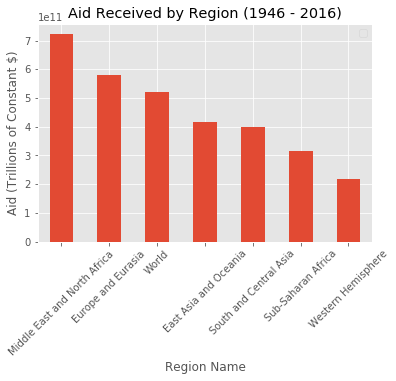

In [29]:
fig = region_const_amt.plot.bar(x = "Region Name", y = "Aid in Constant Dollars")
plt.title("Aid Received by Region (1946 - 2016)")
plt.xlabel("Region Name")
plt.xticks(rotation = 45)
plt.ylabel("Aid (Trillions of Constant $)")
plt.legend("")
#plt.text("*Data through 12/04/17")
plt.show()
#plt.tick_params(labelsize=14)
#format()
#fig.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))

#ax.yaxis.set_major_formatter(FormatStrFormatter('.2f'))
#set_major_formatter(mtick.FormatStrFormatter('%.0e')) 

#ax.get_yaxis().set_major_formatter(
    #matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x) * 1000, ',')))

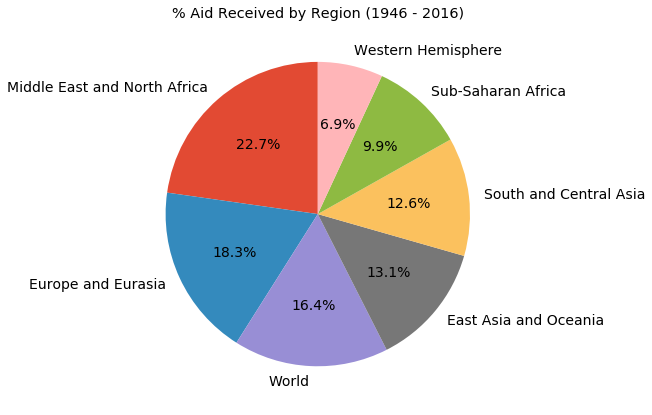

In [56]:
# plot chart
fig = plt.figure(figsize=[15, 15])

ax1 = plt.subplot(121, aspect='equal')
region_const_amt.plot(kind='pie', title = "% Aid Received by Region (1946 - 2016)", y = 'Aid in Constant Dollars', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=region_const_amt['Region Name'], legend = False, fontsize=14)
plt.ylabel("")
plt.show()

In [55]:
# Donations Received by Country

country_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("country_name").constant_amount.sum().sort_values(ascending = False))

country_const_amt.reset_index(inplace = True)
country_const_amt.columns = ["Country Name", "Aid in Constant Dollars"]

country_const_amt["Percent of Total"] = country_const_amt["Aid in Constant Dollars"] / country_const_amt["Aid in Constant Dollars"].sum()
country_const_amt["Percent of Total"] = country_const_amt["Percent of Total"].apply(as_percent)

country_const_amt.head(10)

,Country Name,Aid in Constant Dollars,Percent of Total
0,World,"$496,095,872,300.00",15.65%
1,Israel,"$273,900,672,562.00",8.64%
2,Afghanistan,"$206,870,078,952.00",6.52%
3,Egypt,"$164,033,254,490.00",5.17%
4,Iraq,"$142,310,614,589.00",4.49%
5,Vietnam (former South),"$121,379,497,371.00",3.83%
6,Korea Republic,"$79,972,133,810.00",2.52%
7,Pakistan,"$78,235,871,725.00",2.47%
8,United Kingdom,"$73,672,609,328.00",2.32%
9,India,"$71,038,637,015.00",2.24%


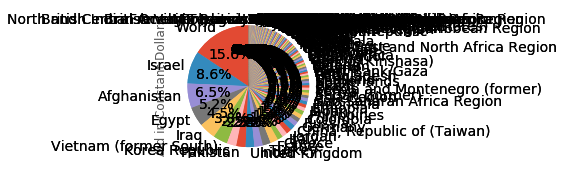

In [45]:
# plot chart
ax1 = plt.subplot(121, aspect='equal')
country_const_amt.plot(kind='pie', y = 'Aid in Constant Dollars', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=country_const_amt['Country Name'], legend = False, fontsize=14)

plt.show()

In [31]:
# Looking for data gap for "World" between regions and country slices

world_in_region_not_country = us_for_aid_df_adj[us_for_aid_df_adj.region_name == "World"]
world_in_region_not_country = world_in_region_not_country[world_in_region_not_country.country_name != "World"]
world_in_region_not_country.head(20)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,implementing_agency_acronym,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,USG_sector_id,USG_sector_name,submission_id
340,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,1,USAID,...,NaN,NaN,2,Obligations,1954-01-01,703400000,"$5,108,614,902.00",25,Macroeconomic Foundation for Growth,1
341,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,1,USAID,...,NaN,NaN,2,Obligations,1954-01-01,701900000,"$5,097,720,784.00",25,Macroeconomic Foundation for Growth,1
932,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,4,TREAS,...,NaN,NaN,3,Disbursements,2004-01-01,240818789,"$302,267,975.00",43,International Contributions,32
933,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,4,TREAS,...,NaN,NaN,2,Obligations,2004-01-01,240818789,"$302,267,975.00",43,International Contributions,32
1015,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,4,TREAS,...,NaN,NaN,2,Obligations,1999-01-01,223221000,"$310,792,100.00",43,International Contributions,32
1058,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,4,TREAS,...,NaN,NaN,3,Disbursements,2011-01-01,211372828,"$228,191,476.00",43,International Contributions,32
1059,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,4,TREAS,...,NaN,NaN,2,Obligations,2011-01-01,211372828,"$228,191,476.00",43,International Contributions,32
1101,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,7,DOD,...,NaN,NaN,2,Obligations,1954-01-01,202950000,"$1,473,974,118.00",25,Macroeconomic Foundation for Growth,1
1173,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,7,DOD,...,NaN,NaN,2,Obligations,1953-01-01,195400000,"$1,436,034,921.00",25,Macroeconomic Foundation for Growth,1
1261,1006,ASN,Asia Region,7,World,$nan,NaN,NaN,4,TREAS,...,NaN,NaN,3,Disbursements,2012-01-01,182997711,"$194,014,938.00",43,International Contributions,32


In [32]:
# Donations Received by Year

year_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("fiscal_year").constant_amount.sum().sort_values(ascending = False))
year_const_amt.reset_index(inplace = True)
year_const_amt = year_const_amt.sort_values(by = "fiscal_year", ascending = False)
year_const_amt.columns = ["Year", "Aid in Constant Dollars"]
year_const_amt = year_const_amt.reset_index(drop = True)

year_const_amt["Aid % Change"] = year_const_amt["Aid in Constant Dollars"] / year_const_amt["Aid in Constant Dollars"].shift(-1) - 1
year_const_amt["Aid % Change"] = year_const_amt["Aid % Change"].apply(as_percent)

year_const_amt.head(20)

,Year,Aid in Constant Dollars,Aid % Change
0,2016-01-01,"$94,861,916,152.00",-2.46%
1,2015-01-01,"$97,256,512,607.00",12.59%
2,2014-01-01,"$86,379,601,030.00",-9.70%
3,2013-01-01,"$95,654,851,269.00",-6.41%
4,2012-01-01,"$102,204,936,149.00",-1.59%
5,2011-01-01,"$103,854,284,297.00",4.27%
6,2010-01-01,"$99,601,451,691.00",-1.88%
7,2009-01-01,"$101,506,402,048.00",1.52%
8,2008-01-01,"$99,988,680,940.00",16.93%
9,2007-01-01,"$85,512,727,734.00",3.79%


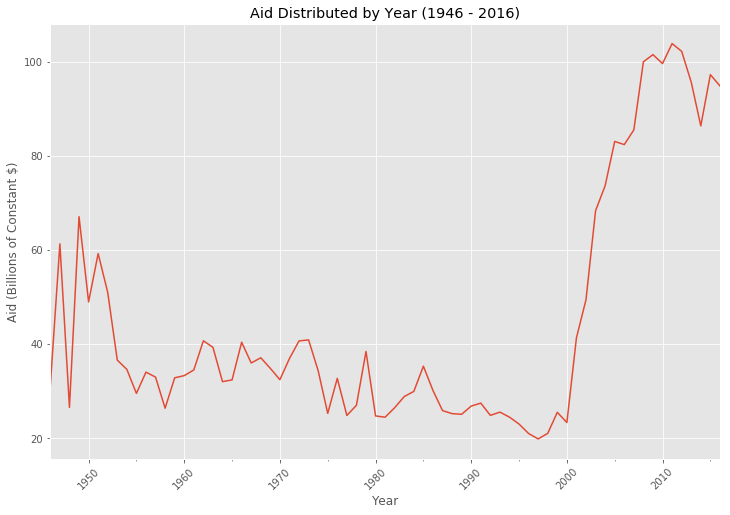

In [33]:
# Graph of Annual Spending Over Time

year_const_amt = year_const_amt.sort_values(by = "Year", ascending = True)

fig, ax = plt.subplots()
year_const_amt.plot(x = "Year", y = "Aid in Constant Dollars", ax = ax, legend = False)
plt.title("Aid Distributed by Year (1946 - 2016)")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Aid (Billions of Constant $)")

fig.set_size_inches(12, 8, forward = True)

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda y, pos: "{0:g}".format(y / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.show()

In [34]:
# Agency Funding Aid

agency_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("funding_agency_name").constant_amount.sum().sort_values(ascending = False))
agency_const_amt.reset_index(inplace = True)
agency_const_amt.columns = ["Agency Funding the Aid", "Aid in Constant Dollars"]
agency_const_amt["Percent of Total"] = agency_const_amt["Aid in Constant Dollars"] / agency_const_amt["Aid in Constant Dollars"].sum()
agency_const_amt["Percent of Total"] = agency_const_amt["Percent of Total"].apply(as_percent)
agency_const_amt.head()

,Agency Funding the Aid,Aid in Constant Dollars,Percent of Total
0,U.S. Agency for International Development,"$1,026,459,529,101.00",32.37%
1,Department of Defense,"$772,966,130,851.00",24.38%
2,Department of State,"$304,719,678,061.00",9.61%
3,Department of Agriculture,"$285,588,074,529.00",9.01%
4,Unknown - Historical Greenbook,"$218,156,694,759.00",6.88%


In [35]:
# Category of Aid

aid_cat_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("assistance_category_name").constant_amount.sum().sort_values(ascending = False))
aid_cat_const_amt.reset_index(inplace = True)
aid_cat_const_amt.columns = ["Category of Aid", "Aid in Constant Dollars"]
aid_cat_const_amt["Percent of Total"] = aid_cat_const_amt["Aid in Constant Dollars"] / aid_cat_const_amt["Aid in Constant Dollars"].sum()
aid_cat_const_amt["Percent of Total"] = aid_cat_const_amt["Percent of Total"].apply(as_percent)
aid_cat_const_amt.head()

,Category of Aid,Aid in Constant Dollars,Percent of Total
0,Economic,"$2,114,098,484,295.00",66.68%
1,Military,"$1,056,550,947,072.00",33.32%


In [36]:
# Name for Aid

aid_name_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby(["activity_name", "assistance_category_name"]).constant_amount.sum().sort_values(ascending = False))

aid_name_const_amt.reset_index(inplace = True)
aid_name_const_amt.columns = ["Activity Benefiting from Aid", "Category of Aid", "Aid in Constant Dollars"]
aid_name_const_amt["Percent of Total"] = aid_name_const_amt["Aid in Constant Dollars"] / aid_name_const_amt["Aid in Constant Dollars"].sum()
aid_name_const_amt["Percent of Total"] = aid_name_const_amt["Percent of Total"].apply(as_percent)
aid_name_const_amt.head(10)

,Activity Benefiting from Aid,Category of Aid,Aid in Constant Dollars,Percent of Total
0,USAID Grants,Economic,"$508,476,562,674.00",16.04%
1,DOD - Foreign Military Financing (FMF) Program...,Military,"$292,759,123,514.00",9.23%
2,ESF,Economic,"$243,807,832,736.00",7.69%
3,Military Assistance Program (MAP),Military,"$229,945,288,906.00",7.25%
4,USAID Loans,Economic,"$139,546,376,300.00",4.40%
5,Afghanistan Security Force Fund,Military,"$131,307,857,818.00",4.14%
6,MASF Grants,Military,"$77,241,708,183.00",2.44%
7,DOD - Foreign Military Financing (FMF) Program...,Military,"$69,890,058,666.00",2.20%
8,Title I Food for Peace Loans ($US),Economic,"$58,580,418,524.00",1.85%
9,Contribution to IDA,Economic,"$49,981,489,950.00",1.58%


In [37]:
# Track Transaction Types

transac_type_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("transaction_type_name").constant_amount.sum().sort_values(ascending = False))
transac_type_const_amt.reset_index(inplace = True)

transac_type_const_amt.columns = ["Aid Transaction Types", "Aid in Constant Dollars"]
transac_type_const_amt["Percent of Total"] = transac_type_const_amt["Aid in Constant Dollars"] / transac_type_const_amt["Aid in Constant Dollars"].sum()
transac_type_const_amt["Percent of Total"] = transac_type_const_amt["Percent of Total"].apply(as_percent)
transac_type_const_amt.head()

,Aid Transaction Types,Aid in Constant Dollars,Percent of Total
0,Obligations,"$2,517,951,266,328.00",79.41%
1,Disbursements,"$652,698,165,039.00",20.59%


In [38]:
# Track Transaction Type by Year

reduced_df = pd.DataFrame(us_for_aid_df_adj[["region_name", "country_name", "fiscal_year", "funding_agency_name", "assistance_category_name", "activity_name", "transaction_type_name", "constant_amount"]].copy())
reduced_df.reset_index(inplace = True)

reduced_sums = pd.DataFrame(us_for_aid_df_adj.groupby(["country_name", "fiscal_year"]).constant_amount.sum())
reduced_sums.reset_index(inplace = True)

reduced_sums.columns = ["Country Name", "Fiscal Year", "Aid in Constant Dollars"]

reduced_sums = reduced_sums.sort_values(["Country Name", "Fiscal Year"], ascending = [True, False])

reduced_sums["Aid % Change"] = reduced_sums["Aid in Constant Dollars"] / reduced_sums["Aid in Constant Dollars"].shift(-1) - 1
reduced_sums["Aid % Change"] = reduced_sums["Aid % Change"].apply(as_percent)

reduced_sums.head(30)

,Country Name,Fiscal Year,Aid in Constant Dollars,Aid % Change
61,Afghanistan,2016-01-01,"$9,284,136,487.00",-46.77%
60,Afghanistan,2015-01-01,"$17,442,098,196.00",18.82%
59,Afghanistan,2014-01-01,"$14,679,360,185.00",-28.52%
58,Afghanistan,2013-01-01,"$20,537,603,773.00",-16.63%
57,Afghanistan,2012-01-01,"$24,635,337,794.00",-8.10%
56,Afghanistan,2011-01-01,"$26,807,524,379.00",30.04%
55,Afghanistan,2010-01-01,"$20,614,838,783.00",5.86%
54,Afghanistan,2009-01-01,"$19,473,469,899.00",0.76%
53,Afghanistan,2008-01-01,"$19,327,093,488.00",70.47%
52,Afghanistan,2007-01-01,"$11,337,708,439.00",51.22%


In [39]:
# Trends for Afghanistan

reduced_sums_Afghan = reduced_sums[reduced_sums["Country Name"] == "Afghanistan"]
reduced_sums_Afghan.head(20)

#reduced_sums_Afghan.columns

,Country Name,Fiscal Year,Aid in Constant Dollars,Aid % Change
61,Afghanistan,2016-01-01,"$9,284,136,487.00",-46.77%
60,Afghanistan,2015-01-01,"$17,442,098,196.00",18.82%
59,Afghanistan,2014-01-01,"$14,679,360,185.00",-28.52%
58,Afghanistan,2013-01-01,"$20,537,603,773.00",-16.63%
57,Afghanistan,2012-01-01,"$24,635,337,794.00",-8.10%
56,Afghanistan,2011-01-01,"$26,807,524,379.00",30.04%
55,Afghanistan,2010-01-01,"$20,614,838,783.00",5.86%
54,Afghanistan,2009-01-01,"$19,473,469,899.00",0.76%
53,Afghanistan,2008-01-01,"$19,327,093,488.00",70.47%
52,Afghanistan,2007-01-01,"$11,337,708,439.00",51.22%


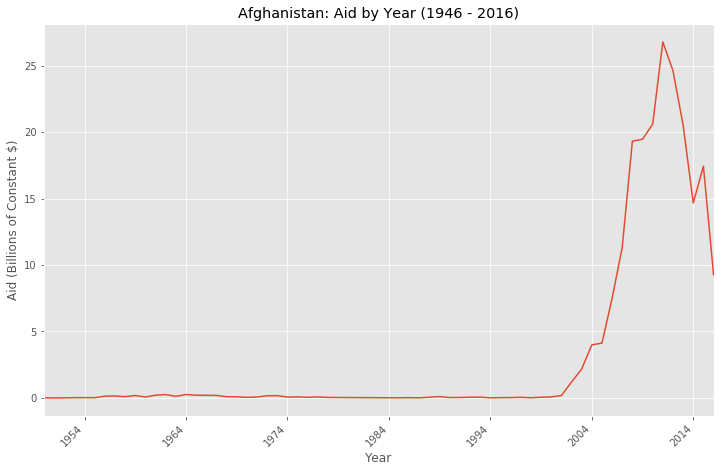

In [40]:
reduced_sums_Afghan = reduced_sums_Afghan.sort_values(by = "Fiscal Year", ascending = True)

fig, ax = plt.subplots()
reduced_sums_Afghan.plot(x = "Fiscal Year", y = "Aid in Constant Dollars", ax = ax, legend = False)
plt.title("Afghanistan: Aid by Year (1946 - 2016)")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Aid (Billions of Constant $)")

fig.set_size_inches(12, 8, forward = True)

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda y, pos: "{0:g}".format(y / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.show()

In [41]:
# Trends for Iraq

reduced_sums_Iraq = reduced_sums[reduced_sums["Country Name"] == "Iraq"]
reduced_sums_Iraq.head(20)

,Country Name,Fiscal Year,Aid in Constant Dollars,Aid % Change
4355,Iraq,2016-01-01,"$9,536,141,824.00",223.89%
4354,Iraq,2015-01-01,"$2,944,297,645.00",251.80%
4353,Iraq,2014-01-01,"$836,925,814.00",-44.02%
4352,Iraq,2013-01-01,"$1,495,009,766.00",-63.95%
4351,Iraq,2012-01-01,"$4,146,581,241.00",-16.66%
4350,Iraq,2011-01-01,"$4,975,491,442.00",-21.58%
4349,Iraq,2010-01-01,"$6,344,279,718.00",-53.71%
4348,Iraq,2009-01-01,"$13,705,898,100.00",-16.73%
4347,Iraq,2008-01-01,"$16,460,015,094.00",-6.63%
4346,Iraq,2007-01-01,"$17,629,147,165.00",-15.94%


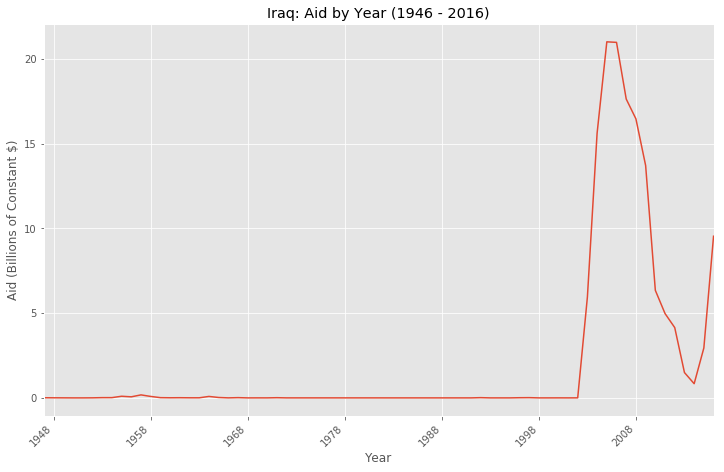

In [42]:
reduced_sums_Iraq = reduced_sums_Iraq.sort_values(by = "Fiscal Year", ascending = True)

fig, ax = plt.subplots()
reduced_sums_Iraq.plot(x = "Fiscal Year", y = "Aid in Constant Dollars", ax = ax, legend = False)
plt.title("Iraq: Aid by Year (1946 - 2016)")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Aid (Billions of Constant $)")

fig.set_size_inches(12, 8, forward = True)

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda y, pos: "{0:g}".format(y / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.show()

In [46]:
# Trends for Egypt

reduced_sums_Egypt = reduced_sums[reduced_sums["Country Name"] == "Egypt"]
reduced_sums_Egypt.head(50)

,Country Name,Fiscal Year,Aid in Constant Dollars,Aid % Change
2910,Egypt,2016-01-01,"$2,520,599,559.00",-17.36%
2909,Egypt,2015-01-01,"$3,050,158,308.00",941.84%
2908,Egypt,2014-01-01,"$292,767,710.00",-91.08%
2907,Egypt,2013-01-01,"$3,280,569,161.00",7.55%
2906,Egypt,2012-01-01,"$3,050,210,807.00",-5.46%
2905,Egypt,2011-01-01,"$3,226,514,842.00",-8.33%
2904,Egypt,2010-01-01,"$3,519,721,705.00",-20.77%
2903,Egypt,2009-01-01,"$4,442,247,347.00",17.79%
2902,Egypt,2008-01-01,"$3,771,438,315.00",-18.54%
2901,Egypt,2007-01-01,"$4,629,811,860.00",17.77%


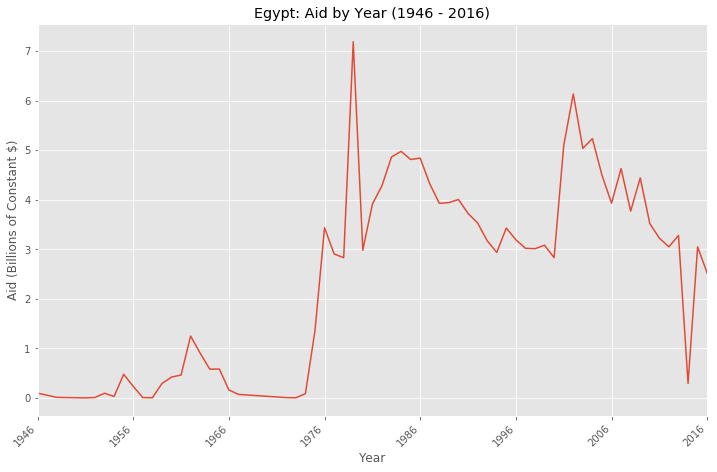

In [44]:
reduced_sums_Egypt = reduced_sums_Egypt.sort_values(by = "Fiscal Year", ascending = True)

fig, ax = plt.subplots()
reduced_sums_Egypt.plot(x = "Fiscal Year", y = "Aid in Constant Dollars", ax = ax, legend = False)
plt.title("Egypt: Aid by Year (1946 - 2016)")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Aid (Billions of Constant $)")

fig.set_size_inches(12, 8, forward = True)

scale_y = 1e9
ticks_y = ticker.FuncFormatter(lambda y, pos: "{0:g}".format(y / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.show()

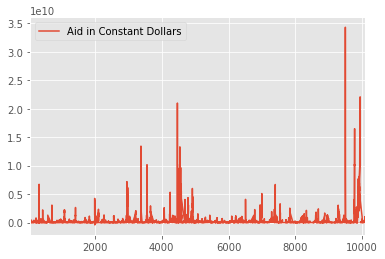

In [348]:

#mon_contrib_wide = mon_contrib.pivot(index='date', columns='cand_nm', values='contb_receipt_amt')
reduced_sums.plot()
plt.show()

#Yoy funding 

#bar charts by country, maybe region

# us budget or gdp, and have foreign aid as a proportion - break by military and non-military (pay attention to inflation)

#size of receiving country population - world bank

#look at from standpoint of years, trend analysis (trend line) - money by year or decade, perhaps by spending level or type

#area chart - kind in plot box, area

Question 3: How has US foreign aid on democratic development (DRG) been spent?
U.S. spending on democracy, human rights and governance by democratic status
By population size (per capita) of recipient country
By GDP per capita in recipient country
Totals by democratic status of recipient regions
Totals by democratic status of recipient countries
By the 10 countries with longest period of within the following democratic status:
>Not Free
>Partly Free
>Free
By GDP status of recipient countries
By Gini status of recipient countries
By HDI status of recipient countries

In [188]:
fhfawb_pickle_df.columns

Index(['FH_Score', 'year', 'country', 'FH_value', 'date', 'gdppc', 'gini',
       'nat', 'pop', 'voice', 'wb_code', 'GEC', 'ISO3166_S', 'ISO3166_N',
       'internet', 'country_id', 'country_y', 'region_id', 'region_name',
       'income_group_id', 'income_group_name', 'income_group_acronym',
       'implementing_agency_id', 'implementing_agency_acronym',
       'implementing_agency_name', 'implementing_subagency_id',
       'subagency_acronym', 'subagency_name', 'channel_category_id',
       'channel_category_name', 'channel_subcategory_id',
       'channel_subcategory_name', 'channel_id', 'channel_name',
       'dac_category_id', 'dac_category_name', 'dac_sector_code',
       'dac_sector_name', 'dac_purpose_code', 'dac_purpose_name',
       'funding_account_id', 'funding_account_name', 'funding_agency_id',
       'funding_agency_name', 'funding_agency_acronym',
       'assistance_category_id', 'assistance_category_name',
       'aid_type_group_id', 'aid_type_group_name', 'activity_id

In [230]:

#def update_xlabels(ax):
#    xlabels = [format(label, ',.0f') for label in ax.get_xticks()]
#    ax.set_xticklabels(xlabels)

#update_xlabels(ax)
#update_xlabels(ax2)

Y_filt = fhfawb_pickle_df[(fhfawb_pickle_df.year > 1972) ]
s_dac_cat= Y_filt \
.groupby(['dac_sector_name'])[['constant_amount','FH_value']].sum() \
.constant_amount.sort_values(ascending = False)
s_dac_cat.head(10)

Y_filt_df = pd.DataFrame(Y_filt)
Y_filt_df.head()


#s_agency_rank = df_agency_cat.rank(ascending=False).astype(int)
#s_agency_rank = df_agency_cat.rank(ascending=False).astype(int)

#fhfawb_pickle_df

#top_agency = pd.DataFrame(s_agency_rank)

#top_agency['agency'] = s_agency_cat

#top_agency = top_agency.reset_index() \
#.rename(columns={'constant_amount':'rank', 'implementing_agency_acronym': 'agency', 'agency':'constant_amount'}) \
#.set_index('rank')

#top_agency.head(10)





,FH_Score,year,country,FH_value,date,gdppc,gini,nat,pop,voice,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,current_amount,constant_amount,USG_sector_id,USG_sector_name,framework,submission_id
21,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$19,500,000.00","$84,576,112.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
22,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$7,600,000.00","$32,962,998.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
23,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$6,500,000.00","$28,192,037.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
24,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$3,600,000.00","$15,614,052.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
25,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$1,400,000.00","$6,072,131.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00


In [265]:
country_gdp = pd.DataFrame(Y_filt.copy())
country_gdp = pd.DataFrame(country_gdp.groupby(["country", "gdppc", "pop", "year"]).constant_amount.sum())


#country_gdppc.type

#country_gdppc[gdppc].type
country_gdp.reset_index(inplace = True)
country_gdp = country_gdp.sort_values(["country", "year"], ascending = [True, False])
country_gdp = country_gdp.reset_index(drop = True)

country_gdp.columns

country_gdp["gdppc"] = country_gdp["gdppc"].astype(float)
country_gdp["GDP"] = country_gdp["gdppc"] * country_gdp["pop"]


country_gdp["Aid % of GDP"] = country_gdp["constant_amount"] / country_gdp["GDP"]


country_gdp["Aid % of GDP Change"] = country_gdp["Aid % of GDP"] / country_gdp["Aid % of GDP"].shift(-1) - 1

#country_gdp["Aid % of GDP"] = country_gdp["Aid % of GDP"].apply(as_percent)
country_gdp["Aid % of GDP"] = country_gdp["Aid % of GDP"]
country_gdp["Aid % of GDP Change"] = country_gdp["Aid % of GDP Change"]
#country_gdp["Aid % of GDP Change"] = country_gdp["Aid % of GDP Change"].apply(as_percent)


country_gdp.head(20)
#country_gdp.columns

,country,gdppc,pop,year,constant_amount,GDP,Aid % of GDP,Aid % of GDP Change
0,Afghanistan,"$1,739.58","$34,656,032.00",2016,"$27,852,409,461.00","$60,287,050,236.92",$0.46,$-0.48
1,Afghanistan,"$1,747.98","$33,736,494.00",2015,"$52,326,294,588.00","$58,970,664,733.65",$0.89,$0.18
2,Afghanistan,"$1,780.38","$32,758,020.00",2014,"$44,038,080,552.00","$58,321,801,149.60",$0.76,$-0.29
3,Afghanistan,"$1,814.16","$31,731,688.00",2013,"$61,612,811,316.00","$57,566,226,632.68",$1.07,$-0.18
4,Afghanistan,"$1,839.27","$30,696,958.00",2012,"$73,906,013,382.00","$56,460,103,813.60",$1.31,$-0.20
5,Afghanistan,"$1,660.74","$29,708,599.00",2011,"$80,422,573,140.00","$49,338,254,430.56",$1.63,$0.23
6,Afghanistan,"$1,614.26","$28,803,167.00",2010,"$61,844,516,349.00","$46,495,656,381.91",$1.33,$-0.02
7,Afghanistan,"$1,531.17","$28,004,331.00",2009,"$58,420,409,697.00","$42,879,503,310.65",$1.36,$-0.17
8,Afghanistan,"$1,298.14","$27,294,031.00",2008,"$57,981,280,464.00","$35,431,559,620.92",$1.64,$0.65
9,Afghanistan,"$1,284.78","$26,616,792.00",2007,"$34,013,125,317.00","$34,196,594,611.88",$0.99,$0.33


In [267]:
# Trends for Afghanistan

country_gdp_Afghan = country_gdp[country_gdp["country"] == "Afghanistan"]
country_gdp_Afghan.head(20)

#country_gdp_Afghan["Aid % of GDP"] = country_gdp_Afghan["Aid % of GDP"].astype(float)

#print(type(country_gdp_Afghan["Aid % of GDP"][0]))

,country,gdppc,pop,year,constant_amount,GDP,Aid % of GDP,Aid % of GDP Change
0,Afghanistan,"$1,739.58","$34,656,032.00",2016,"$27,852,409,461.00","$60,287,050,236.92",$0.46,$-0.48
1,Afghanistan,"$1,747.98","$33,736,494.00",2015,"$52,326,294,588.00","$58,970,664,733.65",$0.89,$0.18
2,Afghanistan,"$1,780.38","$32,758,020.00",2014,"$44,038,080,552.00","$58,321,801,149.60",$0.76,$-0.29
3,Afghanistan,"$1,814.16","$31,731,688.00",2013,"$61,612,811,316.00","$57,566,226,632.68",$1.07,$-0.18
4,Afghanistan,"$1,839.27","$30,696,958.00",2012,"$73,906,013,382.00","$56,460,103,813.60",$1.31,$-0.20
5,Afghanistan,"$1,660.74","$29,708,599.00",2011,"$80,422,573,140.00","$49,338,254,430.56",$1.63,$0.23
6,Afghanistan,"$1,614.26","$28,803,167.00",2010,"$61,844,516,349.00","$46,495,656,381.91",$1.33,$-0.02
7,Afghanistan,"$1,531.17","$28,004,331.00",2009,"$58,420,409,697.00","$42,879,503,310.65",$1.36,$-0.17
8,Afghanistan,"$1,298.14","$27,294,031.00",2008,"$57,981,280,464.00","$35,431,559,620.92",$1.64,$0.65
9,Afghanistan,"$1,284.78","$26,616,792.00",2007,"$34,013,125,317.00","$34,196,594,611.88",$0.99,$0.33


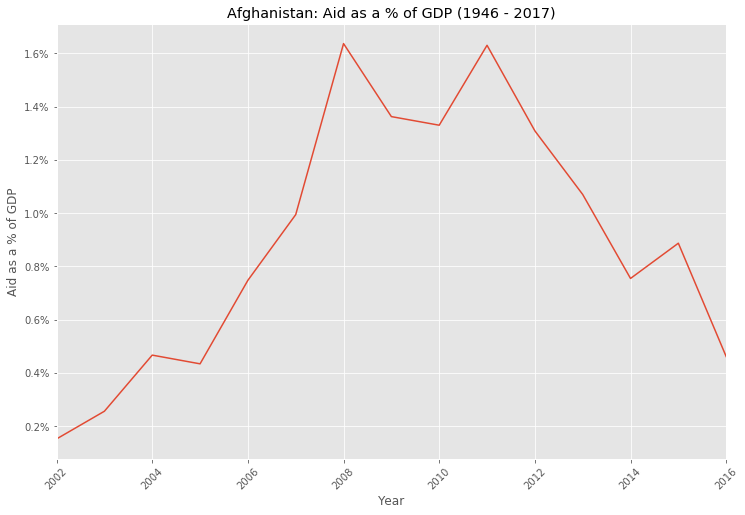

In [349]:
country_gdp_Afghan = country_gdp_Afghan.sort_values(by = "year", ascending = True)

fig, ax = plt.subplots()
country_gdp_Afghan.plot(x = "year", y = "Aid % of GDP", ax = ax, legend = False)
plt.title("Afghanistan: Aid as a % of GDP (1946 - 2017)")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Aid as a % of GDP")

fig.set_size_inches(12, 8, forward = True)

scale_y = 1e-2
ticks_y = ticker.FuncFormatter(lambda y, pos: "{0:g}".format(y / scale_y))
ax.yaxis.set_major_formatter(ticks_y)
fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
ticks_y = ticker.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(ticks_y)

plt.show()

In [282]:
# Trends for Iraq

country_gdp_Iraq = country_gdp[country_gdp["country"] == "Iraq"]
country_gdp_Iraq.head(20)

#country_gdp_Afghan["Aid % of GDP"] = country_gdp_Afghan["Aid % of GDP"].astype(float)

#print(type(country_gdp_Afghan["Aid % of GDP"][0]))

,country,gdppc,pop,year,constant_amount,GDP,Aid % of GDP,Aid % of GDP Change
2006,Iraq,"$16,086.92","$37,202,572.00",2016,"$28,610,825,472.00","$598,474,727,337.51",$0.05,$1.92
2007,Iraq,"$14,928.89","$36,115,649.00",2015,"$8,832,892,935.00","$539,166,421,024.83",$0.02,$2.36
2008,Iraq,"$14,696.64","$35,006,080.00",2014,"$2,510,777,442.00","$514,471,775,787.03",$0.00,$-0.44
2009,Iraq,"$15,078.16","$33,883,145.00",2013,"$4,485,029,301.00","$510,895,507,236.37",$0.01,$-0.66
2010,Iraq,"$14,625.97","$32,776,571.00",2012,"$12,439,743,726.00","$479,389,275,592.69",$0.03,$-0.27
2011,Iraq,"$13,261.60","$31,727,053.00",2011,"$14,926,474,332.00","$420,751,532,114.55",$0.04,$-0.27
2012,Iraq,"$12,717.60","$30,762,701.00",2010,"$19,032,839,154.00","$391,227,650,166.62",$0.05,$-0.56
2013,Iraq,"$12,299.40","$29,894,652.00",2009,"$41,117,694,300.00","$367,686,296,601.58",$0.11,$-0.19
2014,Iraq,"$12,217.45","$29,111,417.00",2008,"$49,380,045,282.00","$355,667,236,886.31",$0.14,$-0.14
2015,Iraq,"$11,575.29","$28,390,433.00",2007,"$52,887,441,495.00","$328,627,420,735.62",$0.16,$-0.17


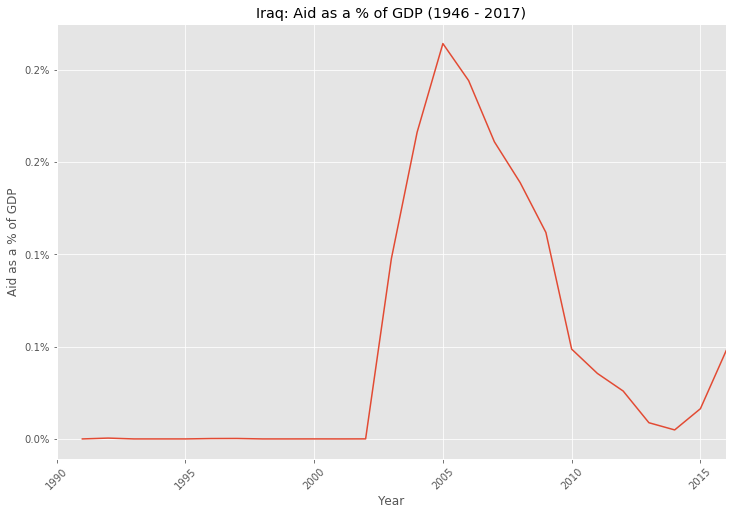

In [350]:
country_gdp_Iraq = country_gdp_Iraq.sort_values(by = "year", ascending = True)

fig, ax = plt.subplots()
country_gdp_Iraq.plot(x = "year", y = "Aid % of GDP", ax = ax, legend = False)
plt.title("Iraq: Aid as a % of GDP (1946 - 2017)")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Aid as a % of GDP")

fig.set_size_inches(12, 8, forward = True)

scale_y = 1e-2
ticks_y = ticker.FuncFormatter(lambda y, pos: "{0:g}".format(y / scale_y))
ax.yaxis.set_major_formatter(ticks_y)
fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
ticks_y = ticker.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(ticks_y)

plt.show()

In [351]:
country_gdp.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana

In [352]:
# Trends for Egypt

country_gdp_Egypt = country_gdp[country_gdp["country"] == "Egypt, Arab Rep."]
country_gdp_Egypt.head(20)

#country_gdp_Afghan["Aid % of GDP"] = country_gdp_Afghan["Aid % of GDP"].astype(float)

#print(type(country_gdp_Afghan["Aid % of GDP"][0]))

,country,gdppc,pop,year,constant_amount,GDP,Aid % of GDP,Aid % of GDP Change
1297,"Egypt, Arab Rep.","$10,319.26","$95,688,681.00",2016,"$7,561,798,680.00","$987,436,084,287.99",$0.01,$-0.21
1298,"Egypt, Arab Rep.","$10,095.61","$93,778,172.00",2015,"$9,150,474,927.00","$946,747,866,752.65",$0.01,$8.98
1299,"Egypt, Arab Rep.","$9,879.80","$91,812,566.00",2014,"$878,303,130.00","$907,089,730,673.91",$0.00,$-0.91
1300,"Egypt, Arab Rep.","$9,814.21","$89,807,433.00",2013,"$9,841,707,480.00","$881,389,198,331.96",$0.01,$0.05
1301,"Egypt, Arab Rep.","$9,822.42","$87,813,257.00",2012,"$9,150,632,421.00","$862,538,707,676.35",$0.01,$-0.08
1302,"Egypt, Arab Rep.","$9,823.82","$85,897,561.00",2011,"$9,679,544,526.00","$843,842,460,027.44",$0.01,$-0.10
1303,"Egypt, Arab Rep.","$9,857.47","$84,107,606.00",2010,"$10,559,165,115.00","$829,088,058,411.60",$0.01,$-0.25
1304,"Egypt, Arab Rep.","$9,561.85","$82,465,022.00",2009,"$13,326,742,041.00","$788,517,970,102.66",$0.02,$0.13
1305,"Egypt, Arab Rep.","$9,305.41","$80,953,881.00",2008,"$11,314,314,945.00","$753,309,454,899.71",$0.02,$-0.24
1306,"Egypt, Arab Rep.","$8,838.52","$79,537,253.00",2007,"$13,889,435,580.00","$702,991,982,807.46",$0.02,$0.10


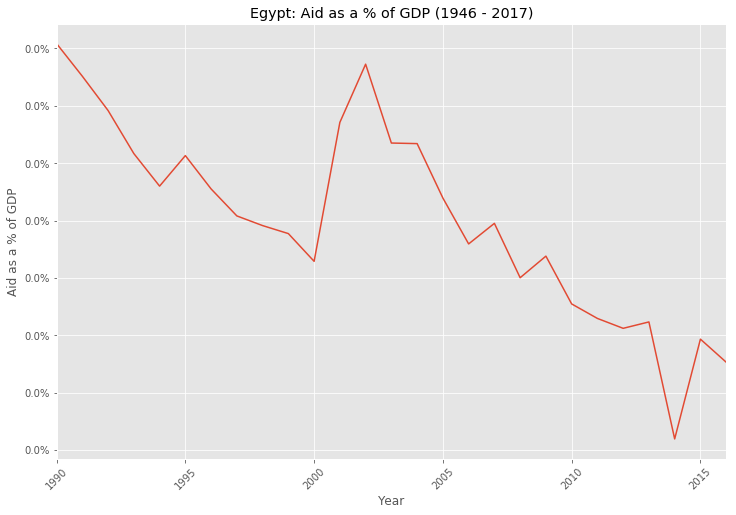

In [353]:
country_gdp_Egypt = country_gdp_Egypt.sort_values(by = "year", ascending = True)

fig, ax = plt.subplots()
country_gdp_Egypt.plot(x = "year", y = "Aid % of GDP", ax = ax, legend = False)
plt.title("Egypt: Aid as a % of GDP (1946 - 2017)")
plt.xlabel("Year")
plt.xticks(rotation = 45)
plt.ylabel("Aid as a % of GDP")

fig.set_size_inches(12, 8, forward = True)

scale_y = 1e-2
ticks_y = ticker.FuncFormatter(lambda y, pos: "{0:g}".format(y / scale_y))
ax.yaxis.set_major_formatter(ticks_y)
fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
ticks_y = ticker.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(ticks_y)

plt.show()

In [231]:


region_gdppc = pd.DataFrame(Y_filt.copy())
region_gdppc = pd.DataFrame(region_gdppc.groupby(["region_name", "gdppc", "pop", "year"]).constant_amount.sum())


#country_gdppc.type

#country_gdppc[gdppc].type
region_gdppc.reset_index(inplace = True)
region_gdppc = region_gdppc.sort_values(["region_name", "year"], ascending = [True, False])
region_gdppc = region_gdppc.reset_index(drop = True)

region_gdppc.columns

region_gdppc["gdppc"] = region_gdppc["gdppc"].astype(float)
region_gdppc["GDP"] = region_gdppc["gdppc"] * region_gdppc["pop"]


region_gdppc["GDP_Over_Aid"] = region_gdppc["GDP"] / region_gdppc["constant_amount"].sum()
region_gdppc["GDP_Over_Aid"] = region_gdppc["GDP_Over_Aid"].apply(as_percent)



region_gdppc.head(20)
#country_gdppc

,region_name,gdppc,pop,year,constant_amount,GDP,GDP_Over_Aid
0,East Asia and Oceania,"$2,072.71","$599,419.00",2016,"$133,283,031.00","$1,242,422,101.74",0.03%
1,East Asia and Oceania,"$2,856.48","$270,402.00",2016,"$24,621,822.00","$772,396,636.85",0.02%
2,East Asia and Oceania,"$3,330.97","$104,937.00",2016,"$724,863,276.00","$349,542,278.26",0.01%
3,East Asia and Oceania,"$3,462.84","$15,762,370.00",2016,"$632,048,037.00","$54,582,580,284.28",1.53%
4,East Asia and Oceania,"$3,775.13","$53,066.00",2016,"$467,131,416.00","$200,331,026.75",0.01%
5,East Asia and Oceania,"$5,332.47","$107,122.00",2016,"$13,603,062.00","$571,225,113.21",0.02%
6,East Asia and Oceania,"$5,351.55","$52,885,223.00",2016,"$938,887,413.00","$283,018,169,147.95",7.95%
7,East Asia and Oceania,"$5,734.59","$6,758,353.00",2016,"$308,838,393.00","$38,756,360,360.71",1.09%
8,East Asia and Oceania,"$5,882.15","$195,125.00",2016,"$8,770,206.00","$1,147,754,249.25",0.03%
9,East Asia and Oceania,"$5,955.26","$92,701,100.00",2016,"$886,612,368.00","$552,059,327,768.13",15.51%
